In [1]:
!pip install nibabel numpy pandas opencv-python matplotlib seaborn

In [3]:
import numpy as np
import os
import torch
import nibabel as nib
import matplotlib.pyplot as plt

In [13]:
class BratsTorchDataset:
    """
    Dataset to handle and load nii.gz files from the BraTS dataset.

    This class provides an interface to load and access images from the BraTS dataset,
    including T2-weighted (t2w), segmentation (seg), T2-fluid (t2f), T1 contrast-enhanced (t1c),
    and T1 non-contrast (t1n) images. The images are stored in a directory structure that 
    this class navigates to retrieve the required files.

    Attributes:
        base_path (str): The base directory path where the BraTS dataset is stored.
        base_dir (np.ndarray): An array of subdirectory names within the base directory.
    """
    
    def __init__(self, base_path):
        # TODO: Add built-in normalization
        """
        Initializes the BratsTorchDataset with the specified base path.

        Args:
            base_path (str): The path to the directory containing BraTS dataset subdirectories.
        """
        self.base_path = base_path
        self.base_dir = np.array(os.listdir(base_path))
    
    def __len__(self):
        """
        Returns the number of samples in the dataset.

        Returns:
            int: The total number of subdirectories (samples) in the dataset.
        """
        return len(self.base_dir)
    
    def __getitem__(self, idx) -> list:
        """
        Retrieves a list of images for a specific sample index.

        Args:
            idx (int): The index of the sample to retrieve. Can also be a tensor.

        Returns:
            dict: A dictionary containing the keys:
                - path: Path to Data (str)
                - t1n: T1 non-contrast Image (np.ndarray)
                - t1c: Contrast-enhanced Image (np.ndarray)
                - t2w: T2-weighted Image (np.ndarray)
                - t2f: T2-fluid Image (np.ndarray)
                - seg: Segmentation Image (np.ndarray)
                
        Raises:
            IndexError: If the index is out of bounds.
        """
        
        if torch.is_tensor(idx):
            idx = idx.tolist()
        
        folder_path = os.path.join(self.base_path, self.base_dir[idx])
        try:
            img_list = self.__resolve_dir(folder_path)
        except Exception as e:
            print(e)
            print("Anomaly on", folder_path)
        
        return img_list
    
    def __resolve_dir(self, folder_path):
        """
        Resolves the directory to retrieve image files.

        This method reads all files from a given directory, loading each image 
        file into a NumPy array. It distinguishes between directories and files 
        to ensure proper loading of images.

        Args:
            full_path (str): The full path to the sample's directory.

        Returns:
            dict: A dictionary containing the full path and NumPy arrays of loaded images.
        
        Raises:
            Exception: If the file type is not t1n, t1c, t2w, t2f or seg.
        
        Note:
            The first element of the returned dictionary is the full path, followed by 
            NumPy arrays for each image type found in the directory.
        """
        
        folder_path_dir = np.array(os.listdir(folder_path))
        img_dict = {
            "path": folder_path,
            "t1n": None,
            "t1c": None,
            "t2w": None,
            "t2f": None,
            "seg": None
        }
        
        for file in folder_path_dir:
            file_type = file.split(".")[0][-3:].lower()
            
            if file_type not in img_dict:
                raise Exception("Unknown Key Encountered:",file_type)
            
            file_path = os.path.join(folder_path, file)
            
            if os.path.isdir(file_path):
                file_content = os.path.join(file_path, os.listdir(file_path)[0])
            else:
                file_content = file_path
            
            img = nib.load(os.path.join(file_content)).get_fdata()
            img_dict[file_type] = img
            
        return img_dict

In [14]:
data = BratsTorchDataset("/kaggle/input/brats2023-glioma/ASNR-MICCAI-BraTS2023-GLI-Challenge-TrainingData")

In [20]:
sample = data[100]

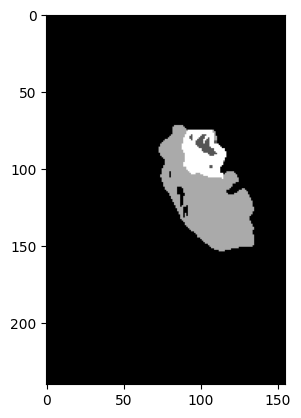

In [25]:
plt.imshow(sample["seg"][100], cmap="gray")